**2024-01-25 `20.1-Supervised-Learning-Supervised Learning`**

Machine Learning is a mysterious topic to so many, but in reality it is nothing more than predicting outcomes based on mathematical trends.  While even that may sound a bit intimidating, there has been so much progress made in the programs used to utilize these mathematical trends, that it is becoming less difficult to implement and interpret all the time.  ML techniques often change or update, but the basics we are going to learn in the coming weeks are going to introduce you to many of the most common methods used today.
There are a lot of links, most of them quick reads, but I promise you will be better prepared if you can glance through them before class.

Here are some resources to get a head start on the first day of ML.

* [Wikipedia - Linear Regression (this is really deep reading)](https://en.wikipedia.org/wiki/Linear_regression)
Wikipedia pages on other ML topics are GREAT, for more approachable learning and for their references. Consider contributing references if you see anything lacking.
* [A slightly easier read on Regression](https://www.statisticssolutions.com/what-is-linear-regression/)
* [One of the python libraries we will be using - sklearn (scikit-learn)](https://scikit-learn.org/stable/index.html)
* [Scikit-learn flow chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/)
* [r-squared definition](https://www.investopedia.com/terms/r/r-squared.asp)
* [One Hot Encoding](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179)

Some terms you want to familiarize yourself with (in addition to the above):
* [Univariate](https://www.statisticshowto.com/univariate/)
* [collinear](https://www.statisticshowto.com/collinear/)
* [Normalization and Standardization](https://www.statisticshowto.com/normalized/)


**Objectives**

* Model and fit several supervised learning classification models using `scikit-learn`.
* Conceptualize and build training and test datasets for supervised learning analysis.
* Define classification in the context of machine learning.
* Evaluate classification algorithms using a confusion matrix and classification report.

**Presentation**
* [20.1-Supervised Learning](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-20.1-Supervised_Learning.pdf?ref_type=heads)

**Resources:**
* [Types of Classification Algorithms](https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14)
* [FICO: Cognitive Fraud Analytics](https://www.fico.com/en/latest-thinking/product-sheet/fico-falcon-platform-cognitive-fraud-analytics-fraud-focused-machine-learning)

# ==========================================

In [1]:
!python -V

Python 3.7.16


In [2]:
# !pip install --upgrade --force-reinstall sklearn
# !pip install --upgrade --force-reinstall matplotlib
# !pip install --upgrade --force-reinstall hvplot Flask Jinja2


### 1.01 Instructor Do: Linear Regression (15 min)

In [77]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

## Data Loading and Visualization

In [79]:
# Read salary data
file_path = Path("01-Ins_Linear_Regression/Resources/salary_data.csv")
df_salary = pd.read_csv(file_path)

# Display sample data
df_salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
# Create a scatter plot of years_experience versus the salary information
salary_plot = df_salary.hvplot.scatter(
    x="years_experience",
    y="salary",
    title="Expected Salary Based on Years of Experience"
)
salary_plot

:Scatter   [years_experience]   (salary)

## Data Preparation

In [97]:
# Reformat data of the independent variable X as a single-column array
# X = df_salary["years_experience"].values.reshape(-1, 1)
X = df_salary[["years_experience"]]


# Display sample data
X[:5]

,years_experience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [98]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(30, 1)

In [99]:
# Create an array for the dependent variable y
y = df_salary["salary"]

## Building the Linear Regression Model

In [100]:
# Create a model with scikit-learn
model = LinearRegression()

In [101]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [102]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [9449.96232146]


In [103]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 25792.20019866871


In [104]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 25792.20019866871 + 9449.962321455074X


In [116]:
# Display the formula to predict the salary for a person with 7 years of experience
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 7")

# Predict the salary for a person with 7 years of experience
y_7 = model.intercept_ + model.coef_[0] * 7

# Display the prediction
print(f"Predicted salary for a person with 7 years of experience: ${y_7:.2f}")

Model's formula: y = 25792.20019866871 + 9449.962321455074 * 7
Predicted salary for a person with 7 years of experience: $91941.94


In [117]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [118]:
predicted_y_values

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [119]:
# Create a copy of the original data
df_salary_predicted = df_salary.copy()

# Add a column with the predicted salary values
df_salary_predicted["salary_predicted"] = predicted_y_values

# Display sample data
df_salary_predicted.head()

,years_experience,salary,salary_predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [114]:
# Create a line plot of years_experience versus the predicted salary values
best_fit_line = df_salary_predicted.hvplot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red"
)
best_fit_line

:Curve   [years_experience]   (salary_predicted)

In [18]:
# Superpose the original data and the best fit line
salary_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [years_experience]   (salary)
   .Curve.I   :Curve   [years_experience]   (salary_predicted)

## Linear Regression Model Assessment

In [120]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9569566641435086.
The r2 is 0.9569566641435086.
The mean squared error is 31270951.722280968.
The root mean squared error is 5592.043608760662.
The standard deviation is 26953.65024877583.


# ==========================================

### 1.02 Students Do: Predict Sales with Linear Regression (15 min)

# Predicting Sales with Linear Regression
## Background
You and some friends created the ultimate child seat. It's a light and water-resistant car seat that can be folded and stored in a backpack; it's the perfect solution for traveling families.

You wanted to spread the word about your invention, so you decided to run a digital marketing campaign using online ads. After running the campaign for a few days, displaying a different number of ads each day, you wanted to create a model to predict the expected sales on any given day, depending on the number of ads you decided to show that day.

You realized that this is an excellent opportunity to use your linear regression skills to create a prediction model.
## Instructions
Use the following steps to create a linear regression model to predict sales based on the historical data provided:
1. Load and visualize the sales data.
2. Prepare the data to fit the linear regression model.
3. Build the linear regression model using the `LinearRegression` module of `scikit-learn`.
4. Plot the best fit line for the sales prediction model.
5. Use the linear regression model to manually predict the sales in the case of 100 ads.
6. Make predictions using the `predict` function of the `LinearRegression` module.

---

In [122]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

## Load and Visualize the Sales Data

In [124]:
# Read the sales data
file_path = Path("02-Stu_Predicting_Sales/Resources/sales.csv")
df_sales = pd.read_csv(file_path)

# Display sample data
df_sales.head()

,ads,sales
0,21,8350
1,180,22820
2,50,12950
3,195,21105
4,96,15008


In [125]:
# Create a scatter plot of ads versus the sales information
sales_plot = df_sales.hvplot.scatter(
    x="ads",
    y="sales",
    title="Sales per Number of Ads"
)
sales_plot

:Scatter   [ads]   (sales)

## Prepare the Data to Fit the Linear Regression Model

In [128]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = df_sales["ads"].values.reshape(-1, 1)
X = df_sales[["ads"]]

# Display sample data
X[:5]

,ads
0,21
1,180
2,50
3,195
4,96


In [129]:
# Create an array for the dependent variable y with the sales data
y = df_sales["sales"]

## Build the Linear Regression Model

In [130]:
# Create a model with scikit-learn
model = LinearRegression()

In [131]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [132]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [81.34898394]


In [133]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 7764.796945240416


In [134]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 7764.796945240416 + 81.34898393753775X


## Plot the Best Fit Line for the Sales Prediction Model

In [135]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [136]:
# Create a copy of the original data
df_sales_predicted = df_sales.copy()

# Add a column with the predicted sales values
df_sales_predicted["sales_predicted"] = predicted_y_values

# Display sample data
df_sales_predicted.head()

,ads,sales,sales_predicted
0,21,8350,9473.125608
1,180,22820,22407.614054
2,50,12950,11832.246142
3,195,21105,23627.848813
4,96,15008,15574.299403


In [33]:
# Create a line plot of ads versus the predicted sales values
best_fit_line = df_sales_predicted.hvplot.line(
    x = "ads",
    y = "sales_predicted",
    color = "red"
)
best_fit_line

:Curve   [ads]   (sales_predicted)

In [145]:
# Superpose the original data and the best fit line
(sales_plot * best_fit_line)

:Overlay
   .Scatter.I :Scatter   [ads]   (sales)
   .Curve.I   :Curve   [years_experience]   (salary_predicted)

## Make Manual Predictions

In [140]:
# Display the formula to predict the sales with 100 ads
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 100")

# Predict the sales with 100 ads
y_100 = model.intercept_ + model.coef_[0] * 100

# Display the prediction
print(f"Predicted sales with 100 ads: ${y_100:.2f}")

Model's formula: y = 7764.796945240416 + 81.34898393753775 * 100
Predicted sales with 100 ads: $15899.70


## Make Predictions Using the `predict` Function

In [141]:
# Create an array to predict sales for 100, 150, 200, 250, and 300 ads
X_ads = np.array([100, 150, 200, 250, 300])

# Format the array as a one-column array
X_ads = X_ads.reshape(-1,1)

# Display sample data
X_ads

array([[100],
       [150],
       [200],
       [250],
       [300]])

In [37]:
# Predict sales for 100, 150, 200, 250, and 300 ads
predicted_sales = model.predict(X_ads)

In [142]:
# Create a DataFrame for the predicted sales
df_predicted_sales = pd.DataFrame(
    {
        "ads": X_ads.reshape(1, -1)[0],
        "predicted_sales": predicted_sales
    }
)

# Display data
df_predicted_sales

,ads,predicted_sales
0,100,15899.695339
1,150,19967.144536
2,200,24034.593733
3,250,28102.042930
4,300,32169.492127


## Assess the Linear Regression Model

In [39]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9219961974942595.
The r2 is 0.9219961974942595.
The mean squared error is 1922652.7853956919.
The root mean squared error is 1386.5975571144252.
The standard deviation is 4964.6946616416735.


# ==========================================

### 1.03 Instructor Do: Make Predictions with Logistic Regression (15 min)

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

 ## Generate some data

In [147]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


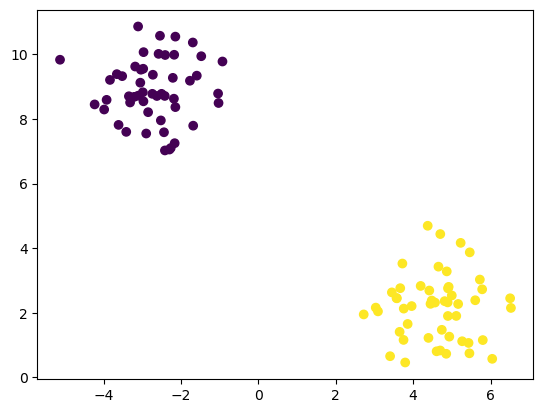

In [148]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

 ## Split our data into training and testing

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

 ## Create a Logistic Regression Model

In [157]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 ## Fit (train) or model using the training data

In [158]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

 ## Validate the model using the test data

In [159]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


 ## Make predictions

In [160]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


## Calculate the Accuracy Score

In [49]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

1.0

## Make a Prediction on a New Single Data Point

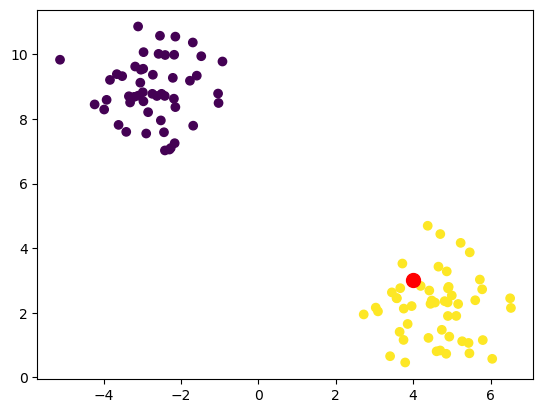

In [173]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[4, 3]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [174]:
# Predict the class (purple or yellow) of the new data point
new_prediction = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {new_prediction}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [1]


# ==========================================

### BREAK (0:10)

# ==========================================

### 1.04.1 Students Do: Predicting Diabetes (20 min)

# Predicting Diabetes
In this activity, you will use a logistic regression model to predict whether an individual has diabetes.
## Instructions
1. Read the data into a Pandas DataFrame.
2. Separate the target (the Outcome column) from the other features.
3. Split the data into training and testing data.
4. Create a logistic regression classifier model. 
    > **Hint:** Use the following parameters: `solver=’lbfgs’`, `max_iter=200`, `random_state=1`.
5. Fit the model to the training data.
6. Print the scores for the training and testing data.
7. Use the testing data to make predictions and compare those to the actual testing data values.
8. Calculate the accuracy score on the predictions. 
> **Hint:** If you get stuck, refer to the instructor demonstration Jupyter notebook for examples of how to complete each step. 

---

 # Predicting Diabetes

In [52]:
from pathlib import Path
import pandas as pd

In [53]:
data = Path('04-Stu_Predicting_Diabetes/Resources/diabetes.csv')
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## Separate the Features (X) from the Target (y)

In [54]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

 ## Split our data into training and testing

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(576, 8)

 ## Create a Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

 ## Fit (train) or model using the training data

In [57]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

 ## Score the model using the test data

In [58]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7829861111111112
Testing Data Score: 0.7760416666666666


 ## Make predictions

In [59]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


## Calculate the Accuracy Score

In [60]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7760416666666666

# ==========================================

### 1.05.1. Instructor Do: Evaluating Logistic Regression Predictions (5 min)

In this activity, you will engage the students in a facilitated discussion on evaluating the results of logistic regression predictions. The focus of this activity is the evaluation of fraud predictions.

Open the slides, and highlight the following points.

In this scenario, we have used a logistic regression model to predict whether an individual has diabetes, based on a set of diagnostic metrics that were provided as a dataset. We evaluated the logistic regression model using a scoring feature. This revealed that the model is somewhat accurate. Can you trust that its predictions are correct?

Ask the students the following questions as you go through the slides:

* **Question:** How sure are you that your models can actually predict diabetes?

* **Answer:** 78% sure, as described by the scored accuracy.

* **Question:** Would you feel comfortable giving the diagnosis of diabetes, based on the predictions of this model? Why or why not?

* **Answer:**  No. Treating diabetes requires medications and a substantial lifestyle change. The accuracy rate is rather low to give a definitive diagnosis.

* **Question:** Would you rather have a model that incorrectly flags diabetes for patients that don't have the disease or would you rather miss predicting the disease in some patients? Which is better: false-positive or false-negative?

 * **Answer:** Neither option is preferred. Both leave opportunities for inaccuracy. However, in the case of a model that incorrectly flags patients as having diabetes, we can use additional tests to refine the prediction and filter out individuals who don’t have diabetes. This way, anyone who potentially has the disease can be given the treatment and attention they need.

The process of evaluating a model requires more than simply scoring or measuring the model for accuracy. In addition to **accuracy**, we must measure for **precision** and **recall**, both of which can be used to eliminate false-positives and false-negatives. These will be covered next.


### 1.05.2. Instructor Do: Accuracy, Precision, Recall (10 min)

In this activity, you'll explain what accuracy, precision, and recall are in relation to logistic regression models, as well as how to measure each metric:

Continue using the slides to cover accuracy, precision, and recall, and highlight the following:

* Explain that **accuracy**, **precision**, and **recall** are especially important for classification models.

* Classification models are binary decision problems. **Binary decision problems** have two possible correct answers: **True Positive** and **True Negative**.

    * Point out that inaccurate and imprecise models result in models returning false-positives and false-negatives.

* When running a classification model, or any statistical model, it is important that the model is evaluated for **accuracy**, **precision**, and **recall**.

* **Accuracy** is how often the model is correct. It is defined by the ratio of correctly predicted observations, the "True Positives" (TP) and "True Negatives" (TN), divided by the total number of observations. The total number of observations can be calculated by adding TP, TN, "False Positives" (FP), and "False Negatives" (FN).

    ```text
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    ```

    * A model’s accuracy can be evaluated by scoring the model using training and testing data on any datasets. Scoring reveals how accurate the model is, but it doesn't tell us how precise the model is.

    * Accuracy can be very susceptible to imbalanced classes. In the case of the homework assignment, the number of good loans greatly outweighs the number of at-risk loans. In this case, it can be really easy for the model to only care about the good loans because they have the biggest impact on accuracy. However, we also care about at-risk loans, so we need a metric that can help us evaluate each class prediction.

* **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision reflects a low false-positive rate.

    ```text
    Precision = TP / (TP + FP)
    ```

    * For example, of all the samples classified as having diabetes or credit risk, how many actually have diabetes or are a credit risk?

    * Another example is that of all the loans predicted to be in good standing&mdash;how many actually are in good standing? Similarly, how many of the loans predicted to be at risk, are actually at risk?

* **Recall** is the ratio of correctly predicted positive observations to all predicted observations for that class. High recall reflects a more comprehensive output and a low false-negative rate.

    ```text
    Recall = TP / (TP + FN)
    ```

    * Recall determines how many of the individuals who are a credit risk were correctly classified by the model as a credit risk.

Encourage students to consult the following [documentation](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) if they need any additional explanation of precision and recall or how they are calculated.

Use the remaining time to answer any questions about logistic regression models and evaluating predictions. Then, move forward with the next activity.

---

### 1.05 Instructor Do: Confusion Matrix & Classification Report (10 min) 

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

 # Generate some data

In [176]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=1, cluster_std=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).tail(10)

,Prediction,Actual
15,0,0
16,0,0
17,0,0
18,1,0
19,0,0
20,1,1
21,1,1
22,0,0
23,0,0
24,1,1


 # Confusion Matrix

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
# tn, fp, fn, tp

array([[11,  1],
       [ 0, 13]], dtype=int64)

 # Classification Report

In [64]:
from sklearn.metrics import classification_report
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Class Purple       1.00      0.92      0.96        12
Class Yellow       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



# ==========================================

### 1.06 Students Do: Classifying Social Media Influencers (20 min) 

# Classifying Social Media Influencers
It's your turn to evaluate how a logistic regression model performs. In this activity, you are working to help a social media startup grow its user base faster. You’ll discover machine learning’s potential to turbocharge the startup’s growth trajectory.
## Background
**Snowballing** is a business growth strategy that is based on the fact that individuals’ social networks tend to have characteristics in common. If you can identify your best customers, you can use them to snowball or influence your marketing to new, but similarly great, customers.

While the startup doesn't yet have many customers, you’ve done a good job of collecting data about their usage statistics. Specifically, you have data in the following columns:
* Usage Stats, a metric that tracks how frequently the customer engages with the product.
* Referral History, which relates to how frequently the customer has referred your product to others in the past.
* Customer Rank, a financial score of how profitable this customer has been.
* Target, which indicates whether a customer has referred your product to a new customer and whether both customers use the product. If this is `True` then Target equals 1.

You’ve been tasked with using this data to build a model that can predict which customers based on their Usage Stats, Referral History, and Customer Rank will likely be the best referrers for new customers. How well will your model classify these snowballing customers?
## Instructions
1. Read in the dataset about the current customers of the startup.
2. Split the data into X and y and then into testing and training datasets.
3. Fit a logistic regression classifier.
4. Create the predicted values for the testing and the training data.
5. Print a confusion matrix for the training data.
6. Print a confusion matrix for the testing data.
7. Print the training classification report.
8. Print the testing classification report.
9. Answer the following question: How does the model performance compare between the training and testing data?
## Resources

Visit the following links for information on the `scikit-learn` modules needed for this activity:
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [train_test_split Function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

---

In [178]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Step 1: Read in the dataset about the current customers of the startup.

In [181]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
customer_df = pd.read_csv(
    Path("06-Stu_Classification_Models/Resources/usage_stats.csv")
)

# Review the DataFrame
display(customer_df.head())
display(customer_df.tail())

,Usage Stats,Referral History,Customer Rank,target
0,1.054075,-2.010163,-0.918689,0
1,2.033251,-0.212776,-2.947451,0
2,1.049233,-2.239878,-0.777080,0
3,0.837035,-1.926558,-1.113686,0
4,1.193770,-1.550953,-1.539586,0


,Usage Stats,Referral History,Customer Rank,target
1205,1.975540,-2.200099,0.345623,1
1206,2.093416,-1.592133,-1.300825,0
1207,2.010334,-1.758225,-1.173162,0
1208,4.451947,-0.502815,-2.355020,0
1209,2.141445,-1.993869,-0.946396,0


## Step 2: Split the data into X and y and then into testing and training sets.

In [182]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = customer_df['target']

# The X variable should include all features except the target
X = customer_df.drop(columns=['target'])


In [183]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 3: Fit a logistic regression classifier.

In [184]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

## Step 4: Create the predicted values for the testing and the training data.

In [199]:
from sklearn.inspection import permutation_importance
result = permutation_importance(lr_model, X_train, y_train, n_repeats=10, random_state=0)
print(result.importances_mean)
print(result.importances_std)

[0.00639471 0.00418964 0.18180816]
[0.00273642 0.00290869 0.00718681]


In [196]:
dict(zip(customer_df.columns, lr_model.coef_[0]))

{'Usage Stats': -1.1262646899350337,
 'Referral History': 0.7448315744563241,
 'Customer Rank': 3.467924080683589}

In [186]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = lr_model.predict(X_test)


## Step 5: Print a confusion matrix for the training data.

In [187]:
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
# tn, fp, fn, tp
print(training_matrix)

[[801   6]
 [ 16  84]]


## Step 6: Pring a confusion matrix for the texting data.

In [188]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[281   1]
 [  3  18]]


## Step 7: Print the training classification report.

In [189]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       807
           1       0.93      0.84      0.88       100

    accuracy                           0.98       907
   macro avg       0.96      0.92      0.94       907
weighted avg       0.98      0.98      0.98       907



## Step 8: Print the testing classification report.

In [74]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       0.97      0.88      0.92        32

    accuracy                           0.98       303
   macro avg       0.98      0.94      0.95       303
weighted avg       0.98      0.98      0.98       303



## Step 9: Answer the following question

> **Question**: How does the performance of the training and test dataset compare?

> **Sample Answer**: Looking at the two classification reports for the training and test data, it looks as if model performance declined--albeit slightly--on the test data. This is to be expected: this is how well the model is performing on data that the model hasn't seen before. If we're still getting strong precision and recall on the test dataset, this is a good indication about how well the model is likely to perform in real life.

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "20.1-Supervised-Learning-Supervised Learning"
objectives = [
    "Model and fit several supervised learning classification models using scikit-learn",
    "Conceptualize and build training and test datasets for supervised learning analysis",
    "Define classification in the context of machine learning",
    "Evaluate classification algorithms using a confusion matrix and classification report",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))